# **YOLO_NAS**

In [ ]:
### available GPU
!nvidia-smi


Fri Jun 30 06:05:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:

### installing required libraries
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.9/135.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 53.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 97.1 MB/s eta 0:0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=41be95b40be04afbe3a9d947c7a351183da63108b1126c3e8ddb20b1e5993019
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.5
    Uninstalling pyparsing-2.4.5:
      Successfully uninstalled pyparsing-2.4.5
  Attempting uninstall: idna
    Found e

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.8 MB/s eta 0:00:00


In [ ]:
## importing required libraries
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [ ]:

## connecting to the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val



The console stream is logged into /root/sg_logs/console.log


[2023-06-30 06:10:49] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-06-30 06:10:55] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-06-30 06:10:55] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-06-30 06:10:55] WARNING - export.py - Failed to import pytorch_quantization
[2023-06-30 06:10:55] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [ ]:

dataset_params = {
    'data_dir':'/content/drive/MyDrive/ATHULYA_PROJECT/TIG_DATASET',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'test/images',
    'val_labels_dir':'test/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ['Misalignment','Burn through','Contamination','Lack of fusion','Lack of penetration']
}


In [ ]:
import torch

MODEL_ARCH = 'yolo_nas_l'
DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 8
MAX_EPOCHS = 100
CHECKPOINT_DIR = f'/content/drive/MyDrive/ATHULYA_PROJECT/YOLO_NAS/training_backup'
EXPERIMENT_NAME = f'yolo_nas_l_e5'

In [ ]:

### setting up dataloaders
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)


Caching annotations:  97%|█████████▋| 1655/1700 [00:05<00:00, 381.37it/s]

In [ ]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

Caching annotations: 100%|██████████| 1700/1700 [00:05<00:00, 303.43it/s]
[2023-06-30 06:58:52] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth


  0%|          | 0.00/256M [00:00<?, ?B/s]

In [ ]:

from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    "resume" : True,
    "resume_path": '/content/drive/MyDrive/ATHULYA_PROJECT/YOLO_NAS/training_backup/yolo_nas_l_e5/ckpt_latest.pth',
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}


In [ ]:
from super_gradients.training import Trainer

trainer = Trainer(experiment_name=EXPERIMENT_NAME, ckpt_root_dir=CHECKPOINT_DIR)


In [ ]:

%load_ext tensorboard
%tensorboard --logdir {CHECKPOINT_DIR}/{EXPERIMENT_NAME}

In [ ]:

trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

In [ ]:

best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path=f"{CHECKPOINT_DIR}/{EXPERIMENT_NAME}/average_model.pth"
).to(DEVICE)

[2023-06-14 08:58:02] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/drive/MyDrive/weld_defect_detection/YOLONAS/training_backup/yolo_nas_l_e5/average_model.pth EMA checkpoint.


In [ ]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))

Test: 100%|██████████| 253/253 [01:41<00:00,  2.49it/s]


{'PPYoloELoss/loss_cls': 1.2966857,
 'PPYoloELoss/loss_iou': 0.24771355,
 'PPYoloELoss/loss_dfl': 1.5268476,
 'PPYoloELoss/loss': 2.6793919,
 'Precision@0.50': tensor(0.1640),
 'Recall@0.50': tensor(0.8158),
 'mAP@0.50': tensor(0.5579),
 'F1@0.50': tensor(0.2457)}

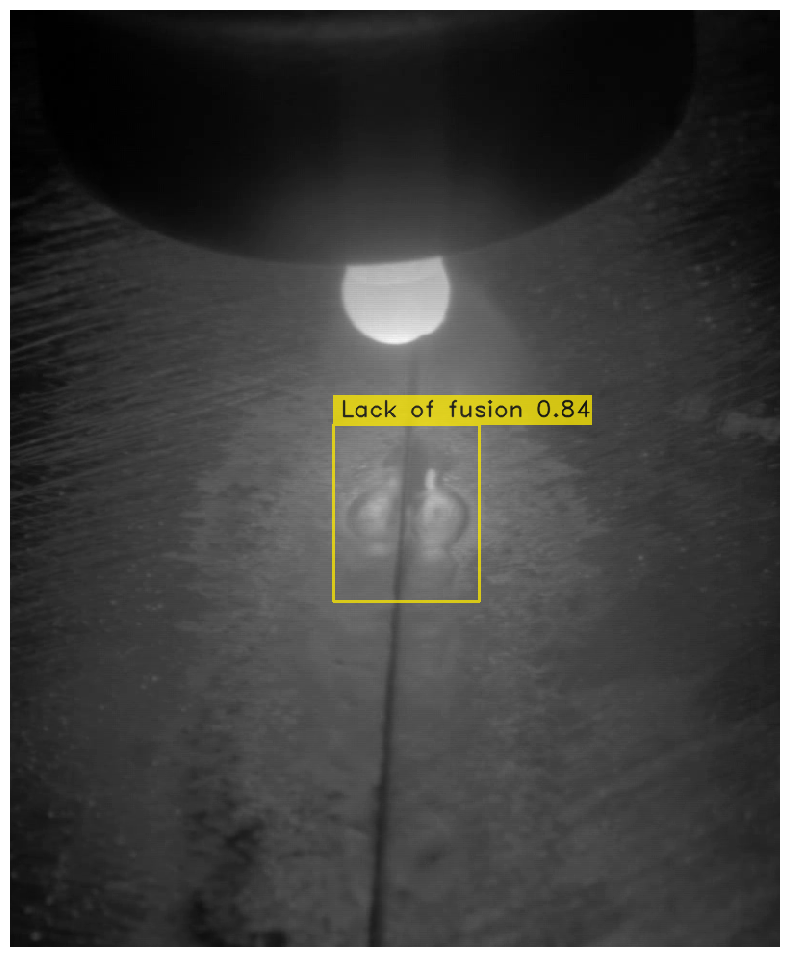

In [ ]:
img_dir = "/content/drive/MyDrive/ATHULYA_PROJECT/YOLO_NAS/training_backup/yolo_nas_l_e5/detect/lack of fusion88.png"
best_model.predict(img_dir).show()

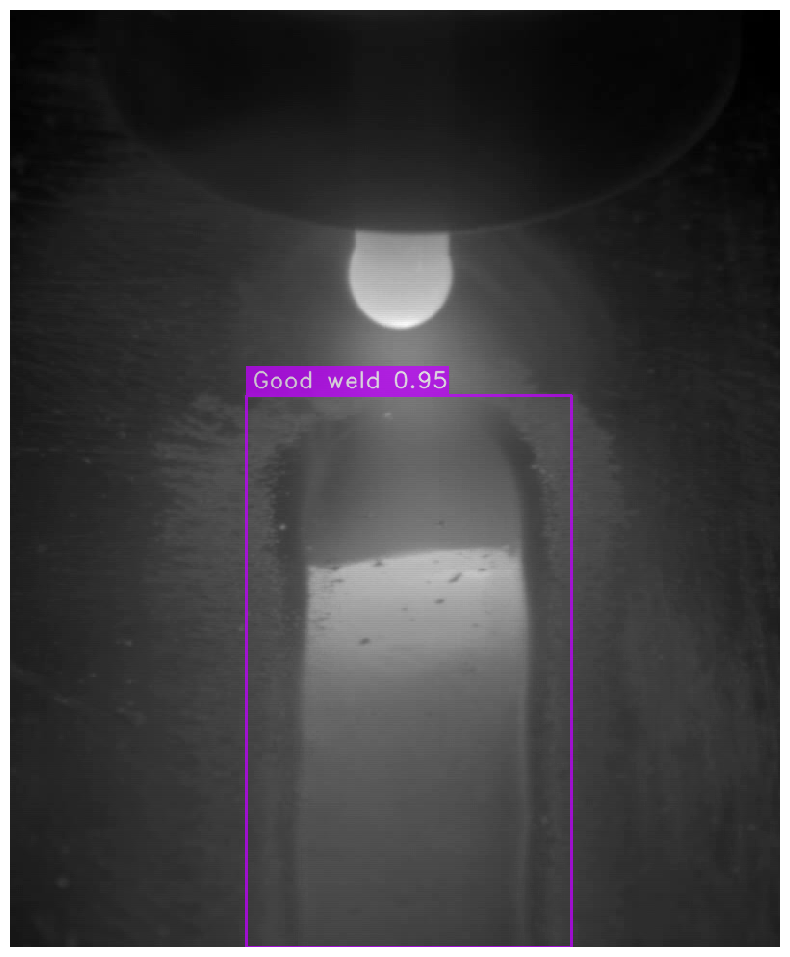

In [ ]:
img_dir = "/content/drive/MyDrive/ATHULYA_PROJECT/YOLO_NAS/training_backup/yolo_nas_l_e5/detect/good88.png"
best_model.predict(img_dir).show()

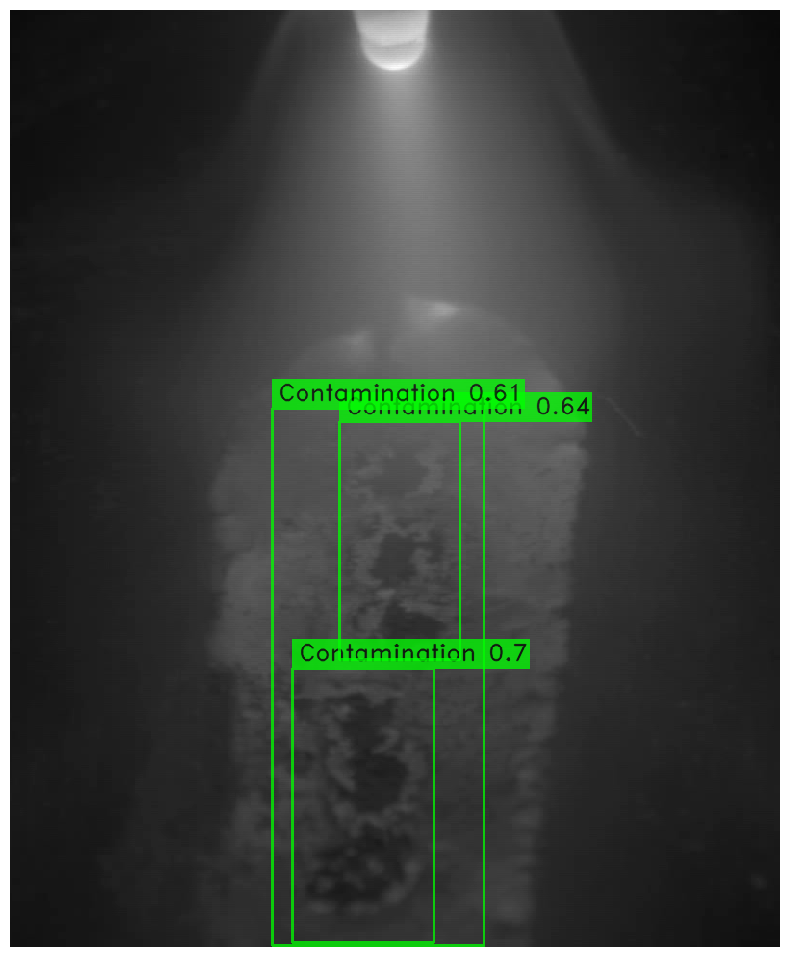

In [ ]:
img_dir = "/content/drive/MyDrive/ATHULYA_PROJECT/YOLO_NAS/training_backup/yolo_nas_l_e5/detect/contamination119.png"
best_model.predict(img_dir).show()


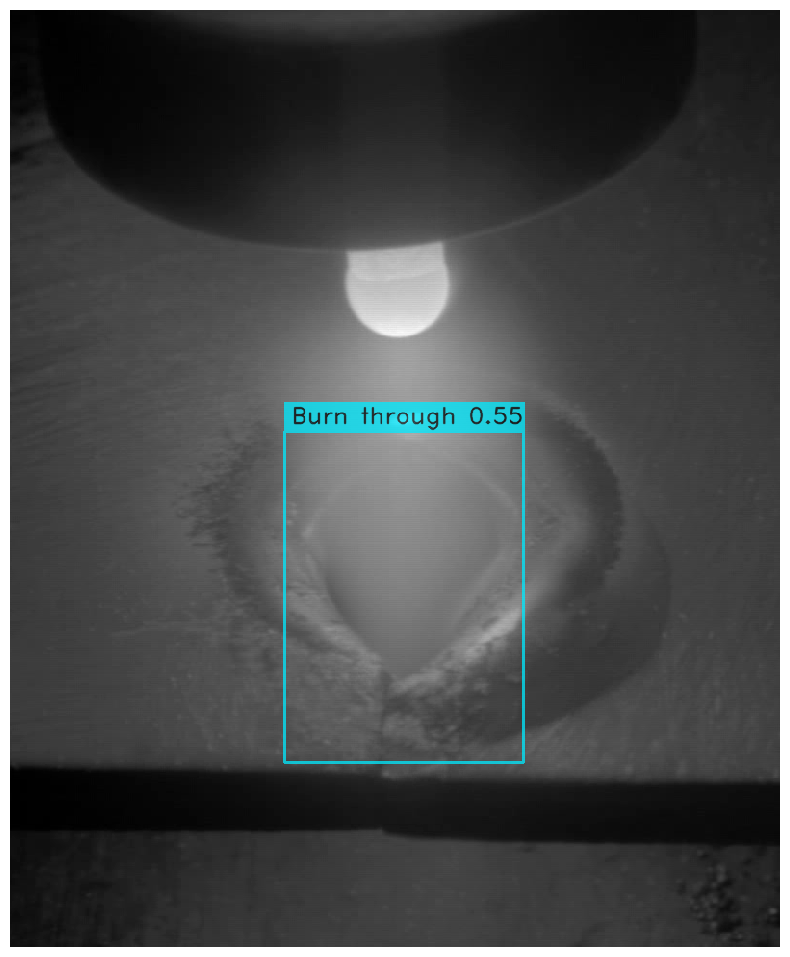

In [ ]:
img_dir = "/content/drive/MyDrive/ATHULYA_PROJECT/YOLO_NAS/training_backup/yolo_nas_l_e5/detect/burn106.png"
best_model.predict(img_dir).show()


In [ ]:

import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install supervision #

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.7 MB/s eta 0:00:00


In [ ]:

import supervision as sv

### creating dataloader for test images
ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"/content/drive/MyDrive/weld_defect_detection/TIG_FINAL_DATASET/test/images",
    annotations_directory_path=f"/content/drive/MyDrive/weld_defect_detection/TIG_FINAL_DATASET/test/labels",
    data_yaml_path=f"/content/drive/MyDrive/weld_defect_detection/yolov5/data/Tig3.yaml",
    force_masks=False
)

In [ ]:
CONFIDENCE_TRESHOLD = 0.5 ### setting up confidence value

predictions = {} ### prediction dictionary

for image_name, image in tqdm(ds.images.items()):
    result = list(best_model.predict(image, conf=CONFIDENCE_TRESHOLD))[0]
    detections = sv.Detections(
        xyxy=result.prediction.bboxes_xyxy,
        confidence=result.prediction.confidence,
        class_id=result.prediction.labels.astype(int)
    )
    predictions[image_name] = detections

  0%|          | 0/2026 [00:00<?, ?it/s]

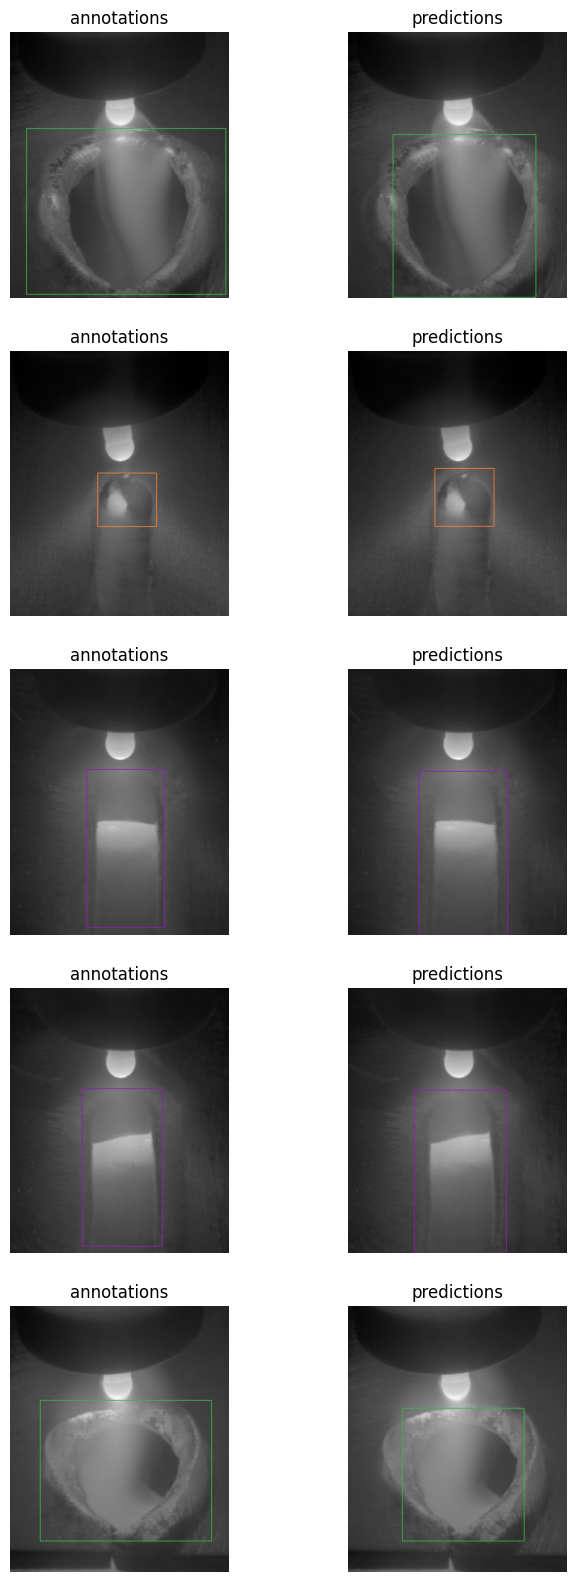

In [ ]:

import random
random.seed(10)

MAX_IMAGE_COUNT = 5 ### number of images to be shown

n = min(MAX_IMAGE_COUNT, len(ds.images))

keys = list(ds.images.keys())
keys = random.sample(keys, n) ### randomly picking images

box_annotator = sv.BoxAnnotator() ### bbox annotator

images = []
titles = []

for key in keys:
    frame_with_annotations = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=ds.annotations[key],
        skip_label=True
    )
    images.append(frame_with_annotations)
    titles.append('annotations')
    frame_with_predictions = box_annotator.annotate(
        scene=ds.images[key].copy(),
        detections=predictions[key],
        skip_label=True
    )
    images.append(frame_with_predictions)
    titles.append('predictions')

### plotting images with annotations and prediction values
%matplotlib inline
sv.plot_images_grid(images=images, titles=titles, grid_size=(n, 2), size=(2 * 4, n * 4))
